[[  2.95233928   2.91514525   2.91982925 ...,   5.91955158   3.9317855
    4.14594784]
 [  3.95365964   4.72073178   3.62292797 ...,   7.47988472   6.3370783
    7.0593958 ]
 [  4.02104288   2.5091268    3.73311277 ...,   4.28420454   4.42327717
    5.40309889]
 ..., 
 [  6.39262167   6.39854145   7.61839637 ...,  10.98056746  10.91884319
   10.36016598]
 [  5.10441522   5.12381411   5.0575034  ...,   7.70622502   8.69118151
    7.3302923 ]
 [  6.30623402   7.47398319   7.84585726 ...,  11.31145691  10.65173336
   11.51918678]]


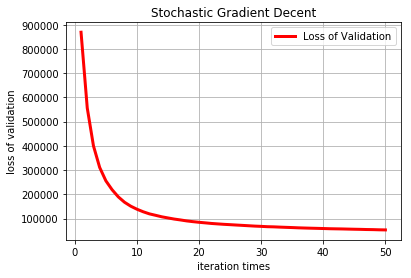

In [1]:
import numpy as np
from matplotlib import pyplot as plt


def load_data(file_num):
    data_base = np.zeros(shape=(943, 1682))
    base_name = 'D:\machine learning\experiment\lab_4\ml-100k\\' + 'u' + str(file_num) + '.base'
    with open(base_name, 'r') as data_file1:
        d_b = data_file1.readlines()
        for line_b in d_b:
            odom_b = line_b.split()  # 将单个数据分隔开存好
            data_base[int(odom_b[0])-1][int(odom_b[1])-1] = float(odom_b[2])

    data_test = np.zeros(shape=(943, 1682))
    test_name = 'D:\machine learning\experiment\lab_4\ml-100k\\' + 'u' + str(file_num) + '.test'
    with open(test_name, 'r') as data_file2:
        d_t = data_file2.readlines()
        for line_t in d_t:
            odom_t = line_t.split()  # 将单个数据分隔开存好
            data_test[int(odom_t[0])-1][int(odom_t[1])-1] = float(odom_t[2])
    return data_base, data_test


def matrix_factorization_sgd(data_train, data_test, p, q, key=5, n_cycle=50, alpha=0.01, beta=0.01):
    q = q.T

    loss = []
    for n in range(n_cycle):
        for n_in in range(20000):
            u = np.random.randint(0, data_train.shape[0] - 1)
            i = np.random.randint(0, data_train.shape[1] - 1)

            if data_train[u][i] > 0:
                e_ui = data_train[u][i] - np.dot(p[u, :], q[:, i])
                for k in range(key):
                    p[u][k] = p[u][k] + alpha * (2 * e_ui * q[k][i] - beta * p[u][k])
                    q[k][i] = q[k][i] + alpha * (2 * e_ui * p[u][k] - beta * q[k][i])

        e = 0

        for a in range(data_test.shape[0]):
            for b in range(data_test.shape[1]):
                if data_test[a][b] > 0:
                    e = e + pow(data_test[a][b] - np.dot(p[a, :], q[:, b]), 2)
                    for k in range(K):
                        e = e + (beta / 2) * (pow(p[a][k], 2) + pow(q[k][b], 2))
        loss.append(e)
        if e < 0.001:
            break

    return p, q.T, loss


def plot_loss(n, losses_validation):
    plt.xlabel('iteration times')
    plt.ylabel('loss of validation')
    plt.title('Stochastic Gradient Decent')
    n_cycles = range(1, n+1)
    plt.plot(n_cycles, losses_validation, label="Loss of Validation", color='red', linewidth=3)
    plt.legend(loc=0)
    plt.grid()
    plt.show()


# main
N_cycle = 50
K = 50
Alpha = 0.005
Beta = 0.01
train, test = load_data(np.random.randint(1, 5))
p_t = np.random.random(size=(train.shape[0], K))
q_t = np.random.random(size=(train.shape[1], K))
P, Q, Loss = matrix_factorization_sgd(train, test, p_t, q_t, K, N_cycle, Alpha, Beta)
R = np.dot(P, Q.T)
print(R)
plot_loss(len(Loss), Loss)